In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Levenshtein

In [2]:
def read_idx3(filename):
    with open(filename, 'rb') as fo:
        buf = fo.read()
        
        index = 0
        header = np.frombuffer(buf, '>i', 4, index)
        
        index += header.size * header.itemsize
        data = np.frombuffer(buf, '>B', header[1] * header[2] * header[3], index).reshape(header[1], -1)
        
        return data
    
def read_idx1(filename):
    with open(filename, 'rb') as fo:
        buf = fo.read()
        
        index = 0
        header = np.frombuffer(buf, '>i', 2, index)
        
        index += header.size * header.itemsize
        data = np.frombuffer(buf, '>B', header[1], index)
        
        return data

In [3]:
train_labels = read_idx1("mnist/train-labels.idx1-ubyte")

train_images = read_idx3("mnist/train-images.idx3-ubyte")

print(train_labels.shape, train_images.shape)

(60000,) (60000, 784)


In [4]:
print(train_images[0])

print(train_labels[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

5


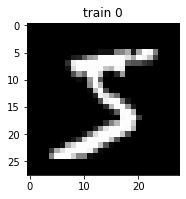

In [5]:
plt.subplot(121)
plt.imshow(train_images[0, :].reshape(28, -1), cmap='gray')
plt.title('train 0')

print(train_labels[0])

In [6]:
# 获取测试集合

test_labels = read_idx1("mnist/t10k-labels.idx1-ubyte")

test_images = read_idx3("mnist/t10k-images.idx3-ubyte")


7


Text(0.5, 1.0, 'test 0')

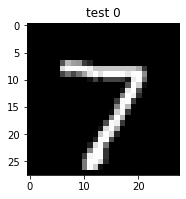

In [7]:
print(test_labels[0])

plt.subplot(122)
plt.imshow(test_images[0, :].reshape(28, -1), cmap='gray')
plt.title('test 0')

In [8]:
print(test_images.shape)

# 使用测试集 作为预处理

from collections import defaultdict

data = defaultdict(lambda : [])

def sHash(img):
    """感知哈希

    Args:
        img ([type]): 一维 784 的数组

    Returns:
        [str]: 感知哈希
    """
    # 感知 哈希
    hash_val = ''
    avg = img.mean()
    
    for x in range(len(img)):
        if img[x] > avg:
            hash_val += '1'
        else:
            hash_val += '0'
    return hash_val

for i in range(len(test_images)):
    img = test_images[i, :]
    # 感知 哈希
    
    data[test_labels[i]].append(sHash(img))

(10000, 784)


In [ ]:
# 使用训练集的第一张用来测试

to_test_image = train_images[0, :]

test_hash = sHash(to_test_image)

def recognize_number(to_test_image_sHash:str):
    
    result = [ 0 for i in range(10)]
    
    
    for k,v in data.items():
    # k - 数字  v - 每个数字的所有感知哈希值
    # 遍历所有的哈希并计算值
        for hash_val in v:
            leven_val = Levenshtein.ratio(to_test_image_sHash, hash_val)
            if leven_val > result[k]:
                result[k] = leven_val

    return result



In [ ]:

result = recognize_number(test_hash)
print(max(result))

print(result.index(max(result)))

print(result)


0.9553571428571429
5
[0.9183673469387755, 0.9260204081632653, 0.9451530612244898, 0.9438775510204082, 0.8864795918367347, 0.9553571428571429, 0.9260204081632653, 0.9387755102040817, 0.9438775510204082, 0.9158163265306123]


0.9438775510204082
6
[0.9285714285714286, 0.9119897959183674, 0.9323979591836735, 0.9349489795918368, 0.8877551020408163, 0.9298469387755102, 0.9438775510204082, 0.8915816326530612, 0.9260204081632653, 0.9081632653061225]


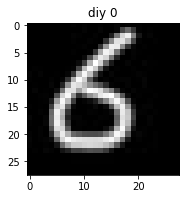

In [ ]:
# 使用我们自己写的图片

from PIL import Image

diy_image = Image.open('MNIST-4.jpg')


diy_arr = np.array(diy_image).flatten()

plt.subplot(122)
plt.imshow(diy_arr.reshape(28, -1), cmap='gray')
plt.title('diy 0')

diy_arr = diy_arr.flatten()
# print(sHash(diy_arr))
r = recognize_number(sHash(diy_arr))
print(max(r))

print(r.index(max(r)))

print(r)


In [ ]:
# 测试结果准确率

statis = {}

for i in range(0, 10):
    statis[i] = {}
    
    statis[i]["correct"] = 0
    statis[i]["all"] = 0

for i in range(100):
    shash_val = sHash(train_images[i, :])
    
    r = recognize_number(shash_val)
    
    real_val = train_labels[i]
    if r.index(max(r)) == real_val:
        statis[real_val]["correct"] += 1
    
    statis[real_val]["all"] += 1



In [ ]:
from icecream import ic



for i in range(10):
    print(i, statis[i]["correct"] / statis[i]["all"])

0 1.0
1 0.9285714285714286
2 0.8333333333333334
3 0.9090909090909091
4 0.9090909090909091
5 1.0
6 1.0
7 0.9
8 1.0
9 0.8181818181818182


In [2]:
import cv2



In [36]:
# 展示图片
def img_show_array(a):
    plt.imshow(a, cmap='gray')
    
# 展示投影图， 输入参数arr是图片的二维数组，direction是x,y轴
def show_shadow(arr, direction = 'x'):

    a_max = max(arr)
    if direction == 'x': # x轴方向的投影
        a_shadow = np.zeros((a_max, len(arr)), dtype=int)
        for i in range(0,len(arr)):
            if arr[i] == 0:
                continue
            for j in range(0, arr[i]):
                a_shadow[j][i] = 255
    elif direction == 'y': # y轴方向的投影
        a_shadow = np.zeros((len(arr),a_max), dtype=int)
        for i in range(0,len(arr)):
            if arr[i] == 0:
                continue
            for j in range(0, arr[i]):
                a_shadow[i][j] = 255

    plt.imshow(a_shadow)

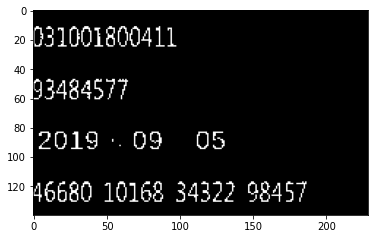

In [4]:
img = cv2.imread('./out/gray-no-title.jpg', cv2.IMREAD_GRAYSCALE)

ret,img_threshed=cv2.threshold(img, 95, 255, 1)

img_show_array(img_threshed)

In [5]:
img_threshed.shape

(140, 229)

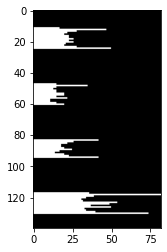

In [6]:
def img_y_shadow(img_b):
    ### 计算投影 ###
    (h,w)=img_b.shape
    # 初始化一个跟图像高一样长度的数组，用于记录每一行的黑点个数
    a=[0 for _ in range(0,h)]
    # 遍历每一列，记录下这一列包含多少有效像素点
    for i in range(0,h):          
        for j in range(0,w):      
            if img_b[i,j]==255:     
                a[i]+=1  
    return a
 
shadow_on_y = img_y_shadow(img_threshed)


show_shadow(shadow_on_y, 'y')

In [7]:
def img2rows(a,w,h):
    
    ### 根据投影切分图块 ### 
    inLine = False # 是否已经开始切分
    start = 0 # 某次切分的起始索引
    mark_boxs = []
    for i in range(0,len(a)):        
        if inLine == False and a[i] > 10:
            inLine = True
            start = i
        # 记录这次选中的区域[左，上，右，下]，上下就是图片，左右是start到当前
        elif i-start >5 and a[i] < 10 and inLine:
            inLine = False
            if i-start > 10:
                top = max(start-1, 0)
                bottom = min(h, i+1)
                box = [0, top, w, bottom]
                mark_boxs.append(box) 
                
    return mark_boxs

In [8]:
(img_h,img_w)=img.shape
row_mark_boxs = img2rows(shadow_on_y,img_w,img_h)
print(row_mark_boxs)

[[0, 10, 229, 26], [0, 46, 229, 62], [0, 82, 229, 96], [0, 116, 229, 132]]


In [9]:
# 裁剪图片,img 图片数组， mark_boxs 区域标记
def cut_img(img, mark_boxs):

    img_items = [] # 存放裁剪好的图片
    for i in range(0,len(mark_boxs)):
        img_org = img.copy()
        box = mark_boxs[i]
        # 裁剪图片
        img_item = img_org[box[1]:box[3], box[0]:box[2]]
        img_items.append(img_item)
    return img_items

# 保存图片
def save_imgs(dir_name, imgs):

    img_paths = []
    for i in range(0,len(imgs)):
        file_path = dir_name+'part_'+str(i)+'.jpg'
        cv2.imwrite(file_path,imgs[i])
        img_paths.append(file_path)
    
    return img_paths

# 切图并保存
row_imgs = cut_img(img_threshed, row_mark_boxs)
imgs = save_imgs('./cut-rows/', row_imgs) # 如果要保存切图
print(imgs)

['./cut-rows/part_0.jpg', './cut-rows/part_1.jpg', './cut-rows/part_2.jpg', './cut-rows/part_3.jpg']


0


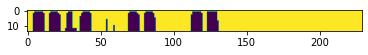

In [47]:
# 切每行

for index, row_img in enumerate(row_imgs):
    # 纵向映射
    if index != 2:
        continue
    #! 膨胀图片
    row_img = cv2.dilate(row_img, np.ones((2,1),np.uint8), iterations=10)
    ### 计算投影 ###
    # plt.imshow(row_img, cmap='gray')
    (h,w)=row_img.shape

    dots_num = [0 for _ in range(0,w)]
    # 遍历每一列，记录下这一列包含多少有效像素点
    # 每列
    for i in range(0,w):
        # 第 i 列的每一行          
        for j in range(0,h):   
            # 判断白点   
            if row_img[j,i] == 0:     
                dots_num[i] += 1
     ### 根据投影切分图块 ### 
    show_shadow(dots_num, 'x')
    is_start = False # 是否已经开始切分
    start_index = 0 # 每次切分的起始索引
    mark_boxs = []
    for i in range(0,len(dots_num)):        
        if is_start == False and dots_num[i] < 15:
            is_start = True
            start_index = i
            # print(f"start_index: {start_index}")
        # 记录这次选中的区域[左，上，右，下]，上下就是图片，左右是start到当前
        elif is_start and dots_num[i] >= 15:
            is_start = False
            if i-start_index > 4:
                left = max(start_index-1, 0)
                right = min(w, i+1)
                box = [left, 0, right, 0]
                mark_boxs.append(box)
                # print(left) 
    print(len(mark_boxs))
    # 裁剪图片
    
    img_items = [] # 存放裁剪好的图片
    for i in range(0,len(mark_boxs)):
        img_org = img.copy()
        box = mark_boxs[i]
        # 裁剪图片
        img_item = img_org[box[1]:box[3], box[0]:box[2]]
        img_items.append(img_item)
    # 保存图片
    # img_paths = []
    # for i in range(0,len(img_items)):
    #     file_path = './cut-rows/'+'row-'+str(index)+ '/' + str(i) +  '.jpg'
    #     cv2.imwrite(file_path,img_items[i])
    #     img_paths.append(file_path)
    
    